In [1]:
import numpy as np
import skimage as ski
from skimage import io, transform,draw
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] =(12,9)
import os
import copy
from IPython.display import clear_output
import compression as comp

#run these if you want to reload imported modules every time the code is run 
%load_ext autoreload
%autoreload 2

In [3]:
# hide the skimage low contrast warning
import warnings
warnings.filterwarnings('ignore')

In [4]:
##### make a bunch of blank 250x250 images with black dots in them for testing and training the neural network 
N = 100 # length of compressed projective representation 
d = 150 #dimension of image 
M = int(round(np.sqrt(2*d**2)))# length of uncompressed projective representation
L = 5 # number of projective representations  MUST BE ODD 

if not os.path.isdir('./data'):
    os.mkdir('./data')
if not os.path.isdir('./data/training'):
    os.mkdir('./data/training')
if not os.path.isdir('./data/testing'):
    os.mkdir('./data/testing')
    
S = comp.sensing_matrix(N,M) 
np.save('./data/sensing_matrix.npy',S)

for i in range(15000):

    points = np.random.randint(0,d,(np.random.randint(0,20),2))
    np.save('./data/training/train-uncomp-%05d.npy'%i,points)

    im = np.zeros((d,d),dtype=float)    
    for p in points:
        im[ski.draw.circle(*p,3,shape=im.shape)] = 1.0
    ski.io.imsave('./data/training/train-%05d.jpg'%i,im)
    
    F = comp.project(points,shape=(d,d),L=L,M=M)
    Y = comp.encode(F,N,S) #encode into length N vectors. S is the sensing matrix
    np.save('./data/training/train-comp-%05d.npy'%i,Y)  
    
for i in range(500):

    points = np.random.randint(0,d,(np.random.randint(0,20),2))
    np.save('./data/testing/test-uncomp-%05d.npy'%i,points)

    im = np.zeros((d,d),dtype=float)    
    for p in points:
        im[ski.draw.circle(*p,3,shape=im.shape)] = 1.0
    ski.io.imsave('./data/testing/test-%05d.jpg'%i,im)
    
    F = comp.project(points,shape=(d,d),L=L,M=M)
    Y = comp.encode(F,N,S) #encode into length N vectors. S is the sensing matrix
    np.save('./data/testing/test-comp-%05d.npy'%i,Y)      

In [4]:
# check that the data encode the positions of the points in the compressed representation 

def check_comp_vs_uncomp(n):
    """ the compressed->uncompressed points are blue plusses
    ground truth is pink circles"""
    im = ski.io.imread('./data/training/train-%04d.jpg'%n)
    pts_u = np.load('./data/training/train-uncomp-%04d.npy'%n)
    pts_c = np.load('./data/training/train-comp-%04d.npy'%n)
    pts_u_ = comp.decompress(pts_c,S,im.shape,L,M)
    im = np.stack((im,)*3,-1)
    for p in pts_u:
        r,c = ski.draw.circle_perimeter(p[0],p[1],5,shape = im.shape)
        im[r,c]=[255,0,255]
    for p in pts_u_:
        im = comp.draw_plus(p,im,col=[0,0,255])
    plt.imshow(im)

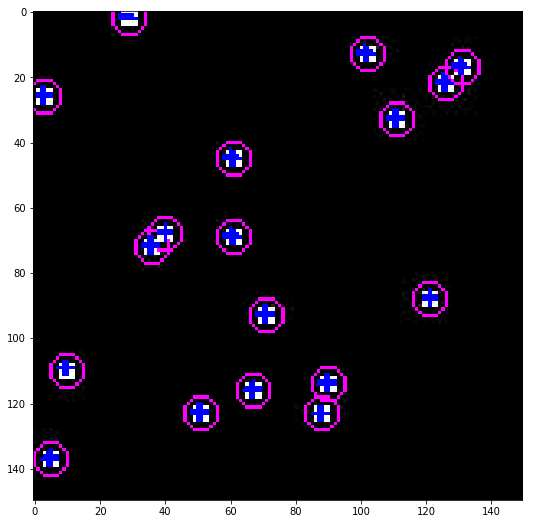

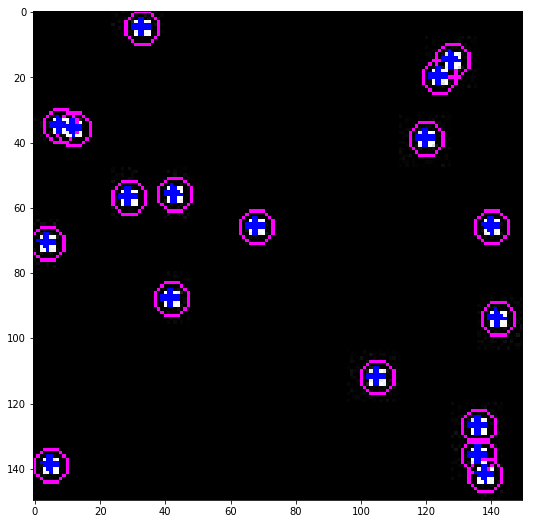

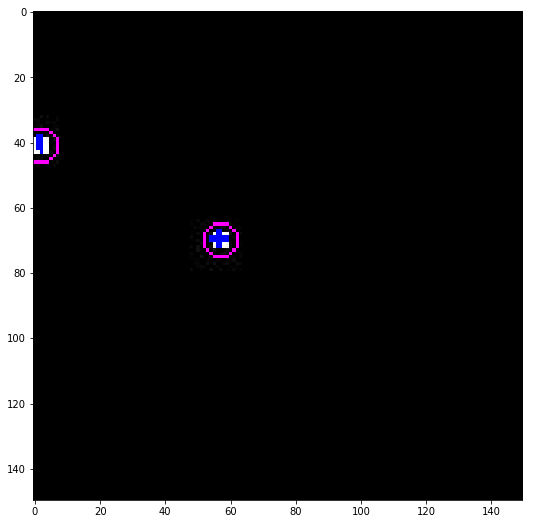

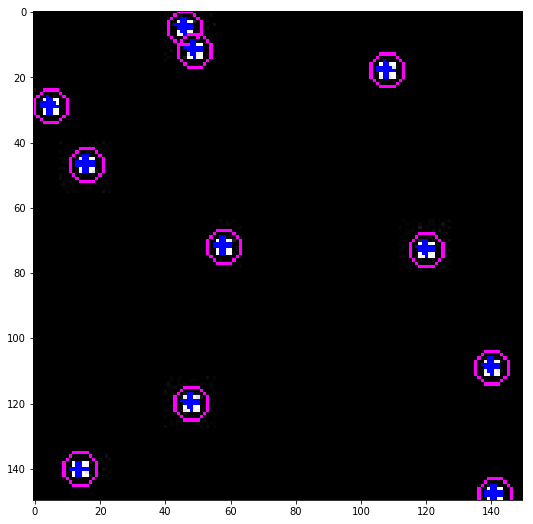

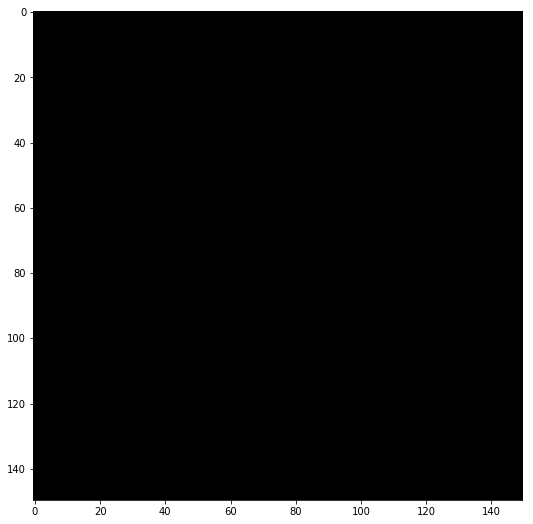

In [10]:
N = np.random.randint(0,15000,size=5)
for n in N:
    check_comp_vs_uncomp(n)
    plt.show()